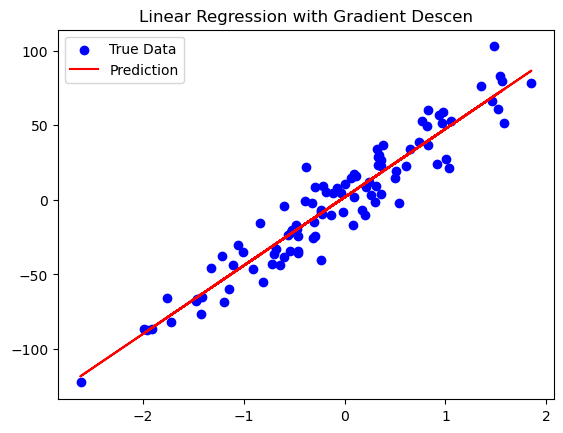

In [9]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

#here I want to experiment how GD behave in regression and classification 
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y, color='blue', label='True Data')
plt.plot(X, y_pred, color='red', label='Prediction')
plt.title("Linear Regression with Gradient Descen")
plt.legend()
plt.show()

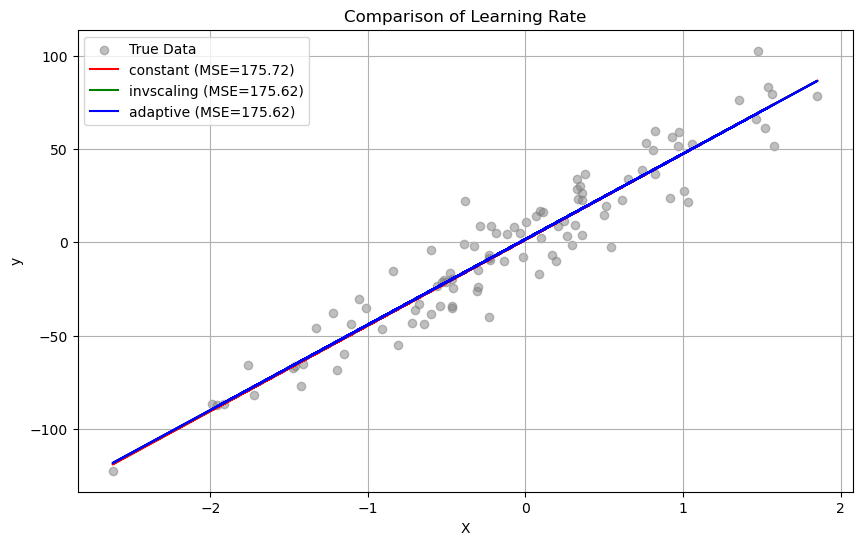

In [15]:
#here I Try different learning rate like "constant"and "adaptive" its look really similar but with small difference but when searching I descover some differences
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Define different learning strategies to compare
strategies = ['constant', 'invscaling', 'adaptive']
results = {}

for strategy in strategies:
    model = make_pipeline(
        StandardScaler(),
        SGDRegressor(max_iter=1000, learning_rate=strategy, eta0=0.01, tol=1e-3, random_state=42, verbose=0)
    )
    model.fit(X, y)
    
    
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    results[strategy] = (model, mse, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label='True Data', alpha=0.5)

colors = ['red', 'green', 'blue']
for color, strategy in zip(colors, strategies):
    _, mse, y_pred = results[strategy]
    plt.plot(X, y_pred, color=color, label=f"{strategy} (MSE={mse:.2f})")

plt.title("Comparison of Learning Rate")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



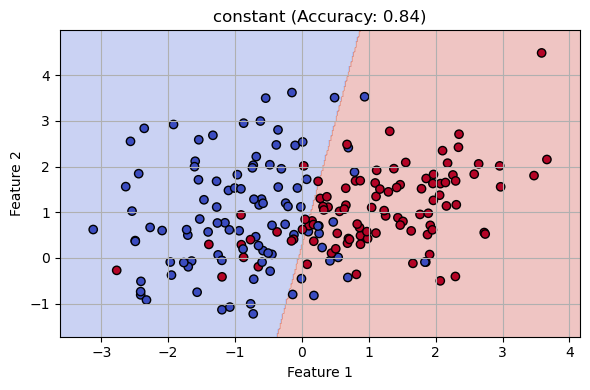

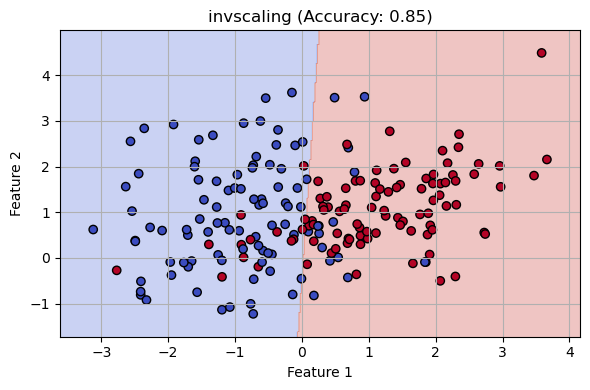

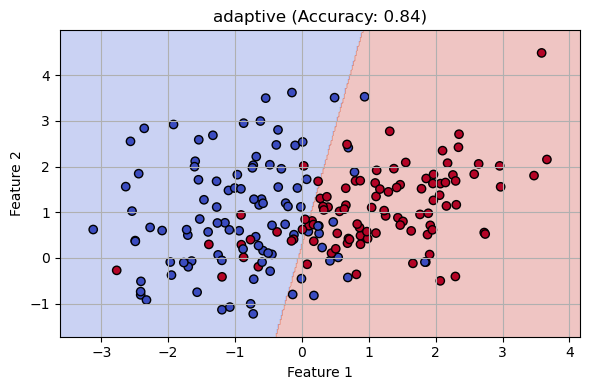

In [16]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Now Testing GD in classification
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=42)

# Also here I want to test many learning strtigies
strategies = ['constant', 'invscaling', 'adaptive']
results = {}

for strategy in strategies:
    model =SGDClassifier(loss='log_loss', learning_rate=strategy, eta0=0.01, max_iter=1000, tol=1e-3, random_state=42)
    model.fit(X, y)
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    results[strategy] = (model, acc)

# Decision boundary plot (function for plotting decision boundary)
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6, 4))
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for strategy in strategies:
    model, acc = results[strategy]
    plot_decision_boundary(model, X, y, f"{strategy} (Accuracy: {acc:.2f})")
